In [15]:
import os
import re

import numpy as np
import torch
import tqdm

### 定义几个辅助函数：
↓👇以下是两个表：单词->单词序号；单词序号->词向量。


In [7]:
word_list = []
vocabulary_vectors = []
# glove_data = open('data/glove.6B.50d.txt', encoding='utf-8')
glove_data = open('data/glove.6B.100d.txt', encoding='utf-8') # 我下下来的glove是100d，yyt你要用的话记得改回上一行（）
for line in glove_data.readlines():
    temp = line.strip('\n').split(' ')  # 一个列表
    name = temp[0]
    word_list.append(name.lower())
    vector = [temp[i] for i in range(1, len(temp))]  # 向量
    vector = list(map(float, vector))  # 变成浮点数
    vocabulary_vectors.append(vector)
# 保存
vocabulary_vectors = np.array(vocabulary_vectors)
word_list = np.array(word_list)
# np.save('npys/vocabulary_vectors', vocabulary_vectors)
# np.save('npys/word_list', word_list)
# 保存你🐎呢，马上就用了
# word_list = np.load('npys/word_list.npy', allow_pickle=True)

# 直接tm给你转成哈希表，傻子才用list一个一个搜索呢，堪称头部螺旋桨
word_list = word_list.tolist()
word2index={} # word->index
for i in range(len(word_list)):
    word2index[word_list[i]]=i

↓👇这个用来从文件中加载原始文本数据并处理成单词列表

In [8]:
def load_data(path, flag='train'):
    labels = ['pos', 'neg']
    data = []
    r = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n。！，]+'
    compiled = re.compile(r)
    for label in labels:
        files = os.listdir(os.path.join(path, flag, label))
        # 去除标点符号
        for file in files:
            with open(os.path.join(path, flag, label, file), 'r', encoding='utf8') as rf:
                temp = rf.read()
                temp = temp.replace('\n', ' ').replace('<br /><br />', ' ')
                temp = re.sub(r, ' \g<0> ', temp)
                temp = temp.split(' ')
                temp = [temp[i].lower() for i in range(len(temp)) if temp[i] != '']
                if label == 'pos':
                    data.append([temp, 1])
                elif label == 'neg':
                    data.append([temp, 0])
            #break # Remember to delete this
    return data

测试一下，看看数据发育正不正常啊

In [9]:
train_data = load_data('./data/aclImdb/')
print(train_data[0])

[['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', '.', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', ',', 'such', 'as', '"', 'teachers', '".', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', 'high', "'", 's', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"', 'teachers', '".', 'the', 'scramble', 'to', 'survive', 'financially', ',', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', "'", 'pomp', ',', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', ',', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', '.', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', ',', 'i', 'immediately', 'recalled', '.........', 'at', '..........', 'high', '.', 'a', 'classic', 'line', ':', '

In [17]:
def process_sentence(flag: str, path: str = 'data/aclImdb', length_limit: int = 250):
    '''Process data into numpy arrays. 
    ---
    Read all texts from file, then process each instance into [word IDs], and save them to numpy file. 
    
    flag should be either "train" or "test". 
    '''
    sentence_code = []
    length=[0 for i in range(1000)]
    #vocabulary_vectors = np.load('npys/vocabulary_vectors.npy', allow_pickle=True)
    test_data = load_data('data/aclImdb', flag)
    cnt=0
    for i in tqdm.tqdm(range(len(test_data))): # Don't be nervous, tqdm is only a progress bar. 
        # print(i)
        vec = test_data[i][0]
        temp = []
        index = 0
        for j in range(len(vec)):
            try:
                index = word2index[vec[j]]
            except KeyError:  # 没找到
                index = 399999
            finally:
                temp.append(index)  # temp表示一个单词在词典中的序号
        
        l=len(temp)
        if(l>=1000):
            l=999
        length[l]+=1
        if l < length_limit:
            for k in range(l, 250):  # 不足补0
                temp.append(0)
        else:
            temp = temp[0:250]  # 只保留250个
        sentence_code.append(temp)
        cnt += 1
            # print(temp)
    # print(length)
    # print(sentence_code)

    sentence_code = np.array(sentence_code)
    if flag == 'train':
        np.save('npys/sentence_code_1', sentence_code)
    else:
        np.save('npys/sentence_code_2', sentence_code)
    return length
result=process_sentence("train")
process_sentence("test")


100%|██████████| 25000/25000 [00:00<00:00, 25432.76it/s]


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 3,
 3,
 4,
 1,
 1,
 7,
 4,
 6,
 6,
 4,
 6,
 7,
 12,
 8,
 14,
 11,
 11,
 16,
 7,
 24,
 14,
 32,
 25,
 21,
 30,
 28,
 32,
 42,
 36,
 46,
 38,
 48,
 34,
 33,
 47,
 38,
 64,
 44,
 43,
 37,
 35,
 43,
 41,
 50,
 60,
 38,
 38,
 41,
 47,
 48,
 42,
 41,
 43,
 48,
 35,
 45,
 45,
 29,
 38,
 40,
 38,
 44,
 42,
 27,
 47,
 35,
 32,
 43,
 35,
 51,
 41,
 48,
 46,
 44,
 34,
 25,
 37,
 33,
 41,
 47,
 53,
 35,
 42,
 41,
 40,
 43,
 43,
 52,
 43,
 55,
 46,
 66,
 62,
 59,
 72,
 56,
 66,
 76,
 63,
 75,
 70,
 92,
 87,
 97,
 100,
 84,
 92,
 107,
 116,
 104,
 95,
 115,
 135,
 137,
 127,
 138,
 154,
 126,
 141,
 139,
 153,
 136,
 158,
 173,
 155,
 139,
 151,
 166,
 152,
 127,
 151,
 137,
 164,
 152,
 141,
 115,
 141,
 115,
 114,
 139,
 111,
 113,
 112,
 109,
 127,
 119,
 105,
 119,
 95,
 106,
 106,
 127,
 104,
 105,
 95,
 108,
 88,
 99,
 103,
 108,
 98,
 116,
 99,
 90,
 78,
 80,
 86,
 95,
 106,
 88,
 86,
 82,

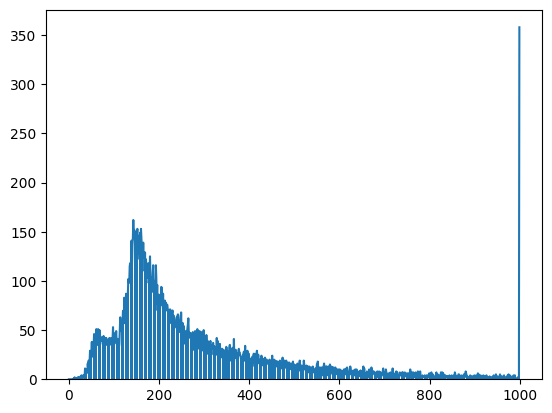

In [18]:
import matplotlib.pyplot as plt

plt.bar(x=range(1000),height=result)
plt.plot(result)